# ***ASSIGNMENT - 13***

## **Importing Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report)

import lightgbm as lgb
from xgboost import XGBClassifier

## **Exploratory Data Analysis (EDA)**


First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 no

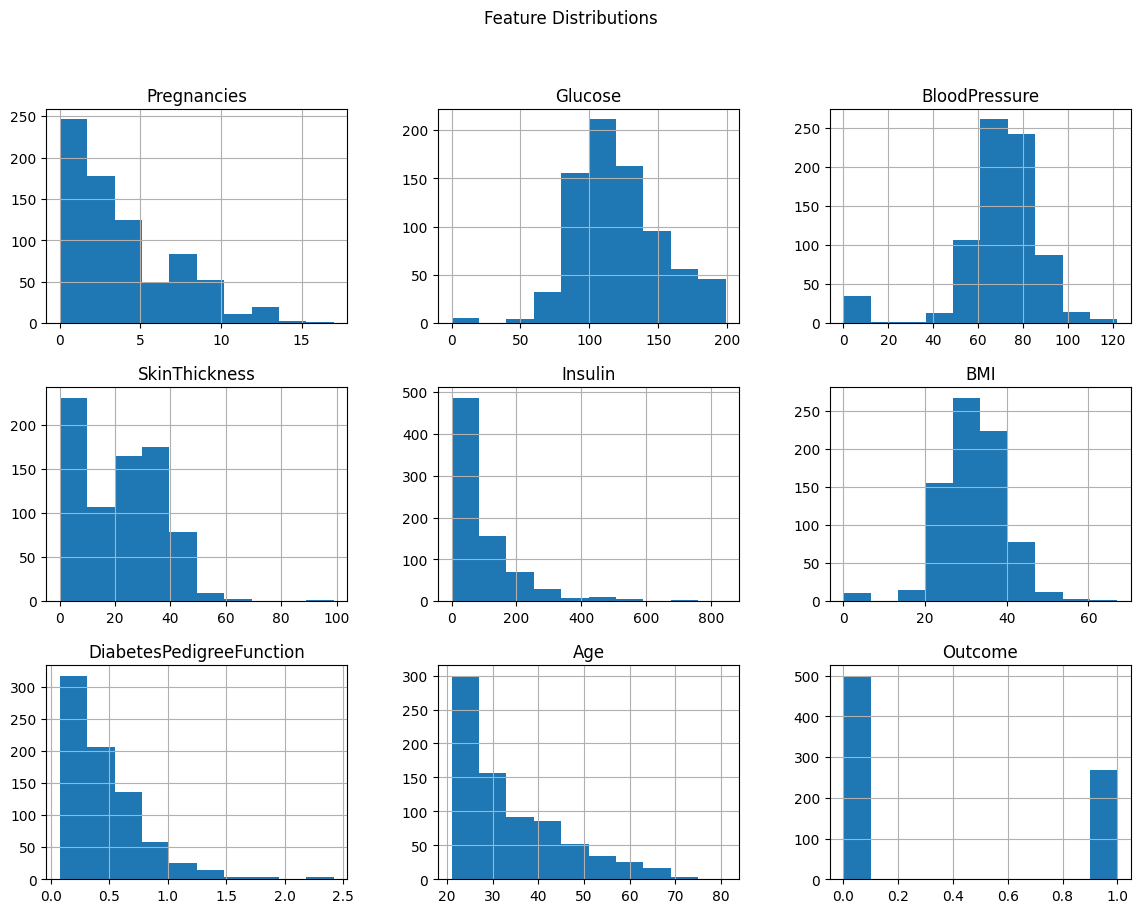

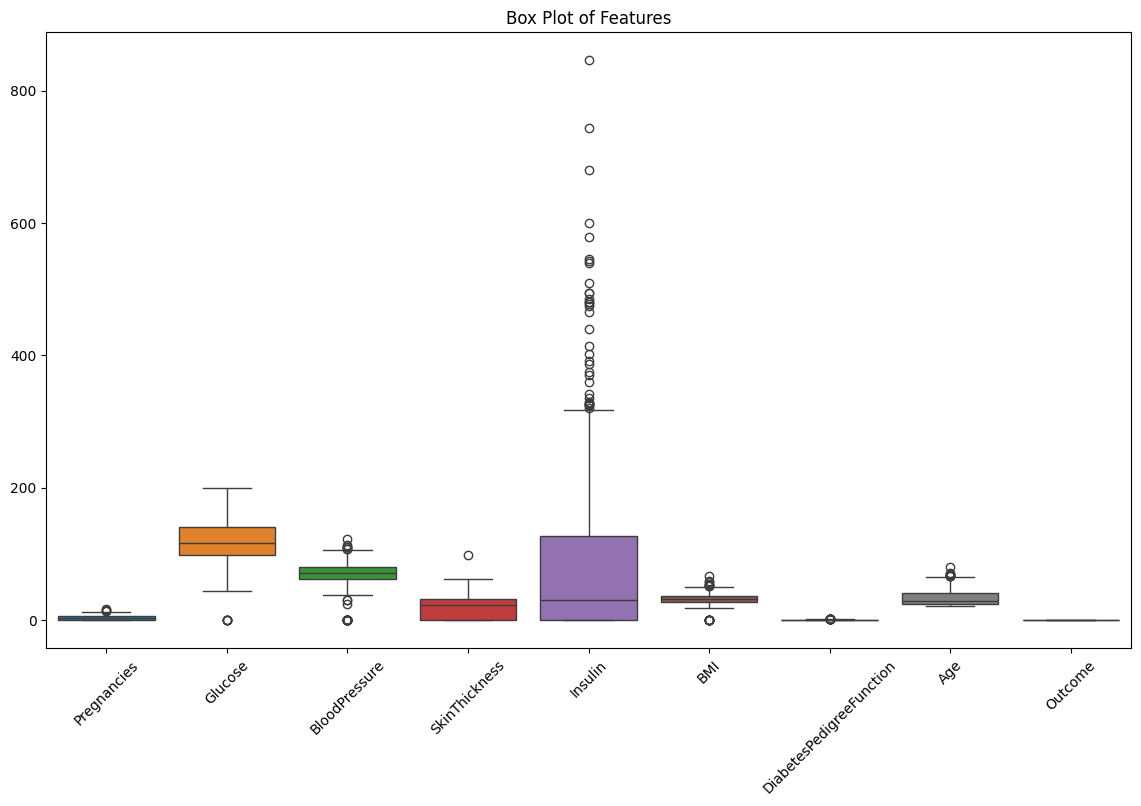

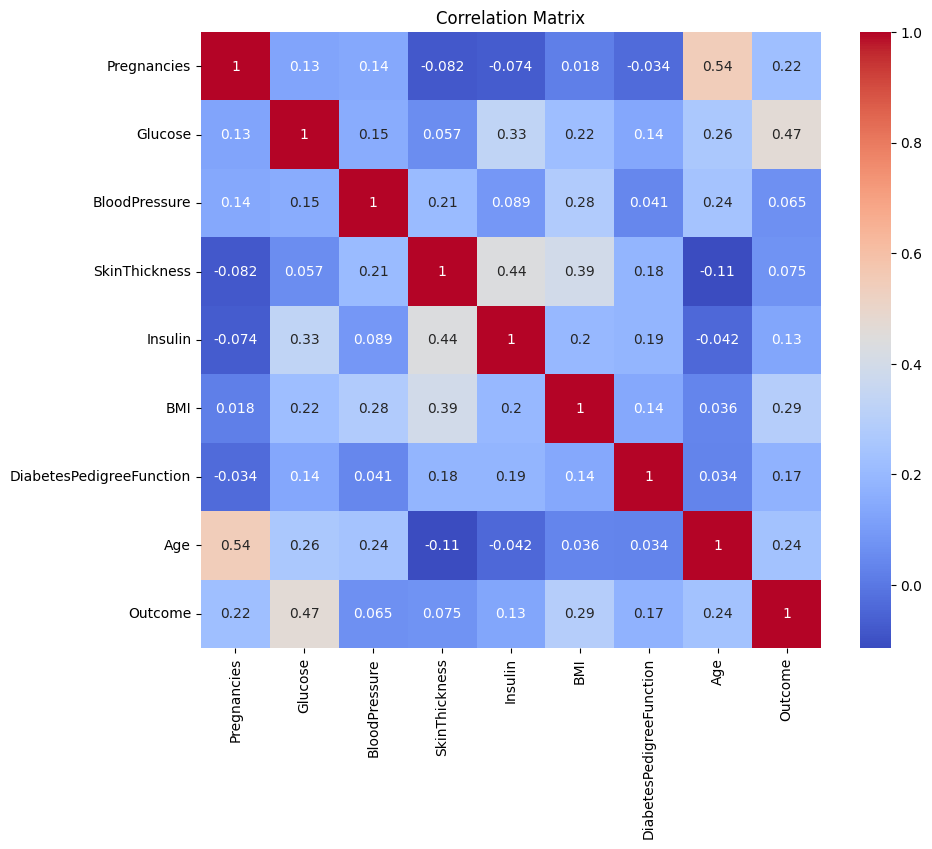

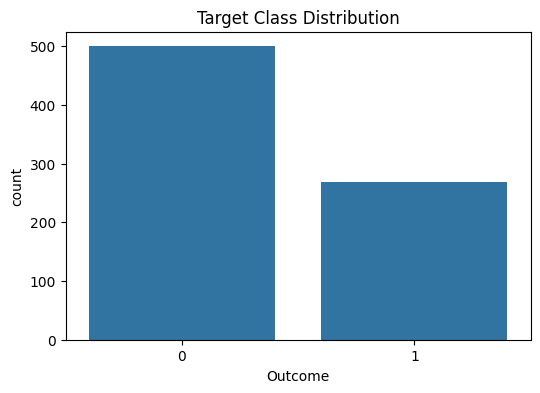

In [ ]:
# Loading the dataset
data = pd.read_csv("diabetes.csv")

print("\nFirst 5 rows of the dataset:")
print(data.head())

print("\nDataset Information:")
print(data.info())

print("\nSummary Statistics:")
print(data.describe())

print("\nMissing Values:")
print(data.isnull().sum())

# ------------------------------------------------------------
# Data Visualization (EDA)
# ------------------------------------------------------------

# Histograms
data.hist(figsize=(14, 10))
plt.suptitle("Feature Distributions")
plt.show()

# Box plots
plt.figure(figsize=(14, 8))
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.title("Box Plot of Features")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Relationship with target
plt.figure(figsize=(6, 4))
sns.countplot(x="Outcome", data=data)
plt.title("Target Class Distribution")
plt.show()

## **Data Preprocessing**

In [ ]:
# Replace zero values with NaN for medically invalid columns
cols_with_zero = [
    "Glucose",
    "BloodPressure",
    "SkinThickness",
    "Insulin",
    "BMI"]

data[cols_with_zero] = data[cols_with_zero].replace(0, np.nan)

# Impute missing values with median
for col in data.columns:
    data[col].fillna(data[col].median(), inplace=True)

# Split features and target
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y)

/tmp/ipython-input-2706607928.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)


## **Building Predictive Models**

In [ ]:
# -----------------------
# LightGBM Model
# -----------------------

lgb_model = lgb.LGBMClassifier(
    n_estimators=100,
    learning_rate=0.05,
    random_state=42
)

lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)

print("\nLightGBM Performance:")
print(f"Accuracy  : {accuracy_score(y_test, lgb_pred):.4f}")
print(f"Precision : {precision_score(y_test, lgb_pred):.4f}")
print(f"Recall    : {recall_score(y_test, lgb_pred):.4f}")
print(f"F1 Score  : {f1_score(y_test, lgb_pred):.4f}")

# Cross Validation
lgb_cv = cross_val_score(lgb_model, X_train, y_train, cv=5, scoring="f1")
print(f"LightGBM CV F1 Score (mean): {lgb_cv.mean():.4f}")

# -----------------------
# XGBoost Model
# -----------------------

xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=4,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss")

xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

print("\nXGBoost Performance:")
print(f"Accuracy  : {accuracy_score(y_test, xgb_pred):.4f}")
print(f"Precision : {precision_score(y_test, xgb_pred):.4f}")
print(f"Recall    : {recall_score(y_test, xgb_pred):.4f}")
print(f"F1 Score  : {f1_score(y_test, xgb_pred):.4f}")

# Cross Validation
xgb_cv = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring="f1")
print(f"XGBoost CV F1 Score (mean): {xgb_cv.mean():.4f}")

[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000207 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 665
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 171, number of negative: 320
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 575
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348269 -> initscore=-0.626657
[LightGBM] [Info] Start training from score -0.626657
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:09:22] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:09:22] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:09:22] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Performance:
Accuracy  : 0.7532
Precision : 0.6739
Recall    : 0.5741
F1 Score  : 0.6200
XGBoost CV F1 Score (mean): 0.6328


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:09:22] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:09:22] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:09:23] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


## **Comparitive Analysis**


Model Comparison:
      Model  Accuracy  F1 Score
0  LightGBM  0.759740  0.640777
1   XGBoost  0.753247  0.620000


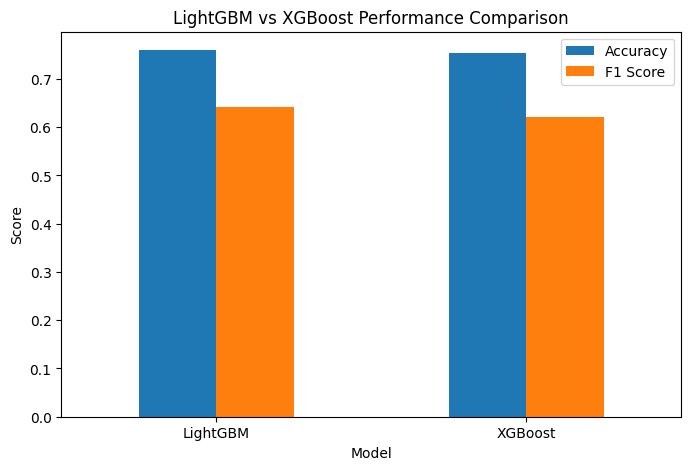

In [ ]:
results = pd.DataFrame({
    "Model": ["LightGBM", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, lgb_pred),
        accuracy_score(y_test, xgb_pred)],
    "F1 Score": [
        f1_score(y_test, lgb_pred),
        f1_score(y_test, xgb_pred)]})

print("\nModel Comparison:")
print(results)

# Visualization
results.set_index("Model").plot(kind="bar", figsize=(8, 5))
plt.title("LightGBM vs XGBoost Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()

### Comparative Analysis Summary:
LightGBM:
- Faster training speed
- Handles large datasets efficiently
- Performs well with less feature engineering

XGBoost:
- Robust and widely used boosting algorithm
- Better control over model complexity
- Performs well on structured tabular data

### Practical Implications:
- LightGBM is preferred when training speed is critical
- XGBoost is preferred when fine-grained control and stability are required

Conclusion:
Both models perform competitively. Choice depends on dataset size,
training time constraints, and model interpretability requirements.